# dataset/review

for CamVid and CamVid-like datasets

In [1]:
import os
from abcli import file
from abcli.modules import objects
from abcli import fullname
from abcli.plugins import cache
from roofAI.semseg.utils import visualize
from roofAI.dataset import RoofAIDataset, MatrixKind
from IPython.display import Image
from abcli import string
from abcli.plugins import seed
import numpy as np

import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"{fullname()}, built on {string.pretty_date()}")

Found credentials in shared credentials file: ~/.aws/credentials
abcli-7.2462.1-2023-06-aws-batch-a, built on 12 November 2023, 20:14:38


In [2]:
# dataset_alias = "roofAI_ingest_CamVid_v1"
# dataset_alias = "roofAI_ingest_AIRS_cache"
dataset_alias = "roofAI_ingest_AIRS_v2"

In [3]:
dataset_object_name = cache.read(dataset_alias)
subset = "test"
index = 0

In [4]:
%%bash -s $dataset_object_name
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

dataset_object_name=$1

abcli download object $dataset_object_name

roofAI_ingest_AIRS_2023-11-12-19-44-22-27771 open download started.
download: s3://kamangir/bolt/roofAI_ingest_AIRS_2023-11-12-19-44-22-27771/_review/christchurch_1011-00000-00000.png to ../../../../storage/abcli/roofAI_ingest_AIRS_2023-11-12-19-44-22-27771/_review/christchurch_1011-00000-00000.png
roofAI_ingest_AIRS_2023-11-12-19-44-22-27771 download completed.


RoofAIDataset[kind:DatasetKind.CAMVID,source:AIRS](roofAI_ingest_AIRS_2023-11-12-19-44-22-27771): 3 subset(s): 250 X test + 350 X train + 100 X val - 2 class(es): other, roof
record_id: christchurch_1011-00000-00000
RoofAIDataset[roofAI_ingest_AIRS_2023-11-12-19-44-22-27771].get_filename(test,christchurch_1011-00000-00000,MatrixKind.IMAGE): /Users/kamangir/storage/abcli/roofAI_ingest_AIRS_2023-11-12-19-44-22-27771/SegNet-Tutorial/CamVid/test/christchurch_1011-00000-00000.png
RoofAIDataset[roofAI_ingest_AIRS_2023-11-12-19-44-22-27771].get_matrix(test,christchurch_1011-00000-00000,MatrixKind.IMAGE): 384x480x3:uint8
RoofAIDataset[roofAI_ingest_AIRS_2023-11-12-19-44-22-27771].get_filename(test,christchurch_1011-00000-00000,MatrixKind.MASK): /Users/kamangir/storage/abcli/roofAI_ingest_AIRS_2023-11-12-19-44-22-27771/SegNet-Tutorial/CamVid/testannot/christchurch_1011-00000-00000.png
RoofAIDataset[roofAI_ingest_AIRS_2023-11-12-19-44-22-27771].get_matrix(test,christchurch_1011-00000-00000,Matri

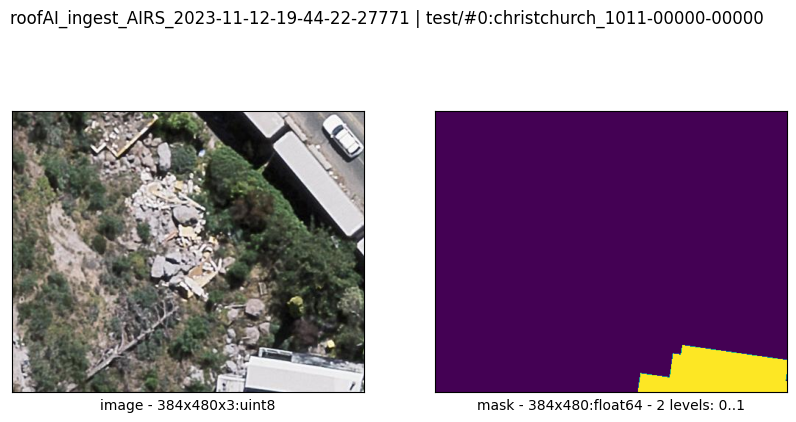

In [5]:
dataset = RoofAIDataset(objects.object_path(dataset_object_name))
dataset.visualize(
        subset=subset,
        index=index,
        in_notebook=True,
        log=True,
    )

In [6]:
seed.log(dataset_object_name)

abcli select roofAI_ingest_AIRS_2023-11-12-19-44-22-27771; open .


In [7]:
# END